# 코로나 검사자수 추이와 확진율 변화 분석
### 백신 접종 이후 검사자와 확진율의 변화가 두드러지게 나타날까?

To-do

1. 전처리
    1. 간혹 분리된 stateDt를 하나로 병합 __ (완료)
    2. 결측치 처리 __ (완료)
    3. 차분을 통해 일별 신규 데이터 구하기 __ (완료)
    4. 불필요한 columns 정리 __ (완료)
    5. 데이터 과거 순서로 재배열 __ (완료)
    
2. 분석
    1. 시각화 __ (완료)
    2. 백신 접종 일자 표시 __ (완료)

In [3]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import matplotlib.pyplot as plt
plt.rc('font', family='NanumGothic')

import warnings
warnings.filterwarnings(action='ignore')


In [4]:
covid_kr = pd.read_csv('../data/covid_korea/Covid19InfState.csv')

데이터 정보를 살펴보자.

In [5]:
covid_kr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1073 entries, 0 to 1072
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   seq             1073 non-null   int64  
 1   stateDt         1073 non-null   int64  
 2   stateTime       1073 non-null   object 
 3   decideCnt       1071 non-null   float64
 4   clearCnt        690 non-null    float64
 5   examCnt         691 non-null    float64
 6   deathCnt        1036 non-null   float64
 7   careCnt         633 non-null    float64
 8   resutlNegCnt    633 non-null    float64
 9   accExamCnt      691 non-null    float64
 10  accExamCompCnt  633 non-null    float64
 11  accDefRate      633 non-null    float64
 12  createDt        1073 non-null   object 
 13  updateDt        76 non-null     object 
dtypes: float64(9), int64(2), object(3)
memory usage: 117.5+ KB


총 1073 rows에 14개의 columns가 있다.  
절반이 넘는 columns에서 높은 비율의 Null값이 있다. 적절한 처리(치환 또는 drop)이 필요해보인다.  
이제 데이터 일부분을 살펴보자.

In [7]:
covid_kr.head(50)

,seq,stateDt,stateTime,decideCnt,clearCnt,examCnt,deathCnt,careCnt,resutlNegCnt,accExamCnt,accExamCompCnt,accDefRate,createDt,updateDt
0,1135,20230118,00:00,29898142.0,NaN,NaN,33057.0,NaN,NaN,NaN,NaN,NaN,2023-01-18 06:08:27.0,NaN
1,1134,20230117,00:00,29861234.0,NaN,NaN,33014.0,NaN,NaN,NaN,NaN,NaN,2023-01-17 03:40:10.0,NaN
2,1133,20230116,00:00,29821035.0,NaN,NaN,32984.0,NaN,NaN,NaN,NaN,NaN,2023-01-16 01:37:44.0,NaN
3,1132,20230115,00:00,29806891.0,NaN,NaN,32949.0,NaN,NaN,NaN,NaN,NaN,2023-01-15 01:16:52.0,2023-01-15 10:03:19.0
4,1130,20230114,00:00,29774321.0,NaN,NaN,32912.0,NaN,NaN,NaN,NaN,NaN,2023-01-14 06:11:49.0,2023-01-14 09:26:34.0
5,1129,20230113,00:00,29737769.0,NaN,NaN,32867.0,NaN,NaN,NaN,NaN,NaN,2023-01-13 05:02:30.0,NaN
6,1128,20230112,00:00,29698043.0,NaN,NaN,32821.0,NaN,NaN,NaN,NaN,NaN,2023-01-12 06:06:08.0,NaN
7,1127,20230111,00:00,29654090.0,NaN,NaN,32745.0,NaN,NaN,NaN,NaN,NaN,2023-01-11 00:50:45.0,NaN
8,1126,20230110,00:00,29599747.0,NaN,NaN,32669.0,NaN,NaN,NaN,NaN,NaN,2023-01-10 06:14:46.0,NaN
9,1125,20230109,00:00,29539706.0,NaN,NaN,32625.0,NaN,NaN,NaN,NaN,NaN,2023-01-09 00:36:55.0,NaN


In [8]:
covid_kr.tail(50)

,seq,stateDt,stateTime,decideCnt,clearCnt,examCnt,deathCnt,careCnt,resutlNegCnt,accExamCnt,accExamCompCnt,accDefRate,createDt,updateDt
1023,50,20200225,16:00,977.0,22.0,13880.0,10.0,NaN,NaN,NaN,NaN,NaN,2020-02-25 17:02:03.03,NaN
1024,49,20200225,09:00,893.0,22.0,13273.0,8.0,NaN,NaN,NaN,NaN,NaN,2020-02-25 10:00:40.40,NaN
1025,48,20200224,16:00,833.0,22.0,11631.0,7.0,NaN,NaN,NaN,NaN,NaN,2020-02-24 17:03:50.50,NaN
1026,47,20200224,09:00,763.0,18.0,8725.0,7.0,NaN,NaN,NaN,NaN,NaN,2020-02-24 10:17:36.36,NaN
1027,46,20200223,16:00,602.0,18.0,8057.0,5.0,NaN,NaN,NaN,NaN,NaN,2020-02-23 17:05:12.12,NaN
1028,45,20200223,09:00,556.0,18.0,6039.0,4.0,NaN,NaN,NaN,NaN,NaN,2020-02-23 10:22:25.25,NaN
1029,44,20200222,16:00,433.0,18.0,6037.0,2.0,NaN,NaN,NaN,NaN,NaN,2020-02-22 17:00:28.28,NaN
1030,43,20200222,09:00,346.0,17.0,5481.0,2.0,NaN,NaN,NaN,NaN,NaN,2020-02-22 9:59:46.46,NaN
1031,42,20200221,16:00,204.0,17.0,3180.0,1.0,NaN,NaN,NaN,NaN,NaN,2020-02-21 17:13:21.21,NaN
1032,41,20200221,16:00,204.0,17.0,3180.0,1.0,NaN,NaN,NaN,NaN,NaN,2020-02-21 17:12:33.33,NaN


tail 쪽의 데이터를 살펴보니 날자는 시간으로 쪼개어져있다. 일별 데이터로 계산하기 위해서는 같은 날의 데이터로 합치는 작업이 필요하다.  
또 head 쪽 데이터를 보면 examCnt(검사자 수) 같이 정부에서 더이상 추적하지 않기로 한 데이터는 Null로 표시되고 있다.  
이 분석에서는 __백신__ 효과에 대해 살펴볼 것이므로 추적 중지 이후의 데이터는 사용하지 않기로 하자.

우선 불필요한 Columns를 정리하자.

In [10]:
covid_kr.columns

Index(['seq', 'stateDt', 'stateTime', 'decideCnt', 'clearCnt', 'examCnt',
       'deathCnt', 'careCnt', 'resutlNegCnt', 'accExamCnt', 'accExamCompCnt',
       'accDefRate', 'createDt', 'updateDt'],
      dtype='object')

In [12]:
covid_kr.drop(columns=['seq', 'clearCnt', 'careCnt', 'resutlNegCnt', 'accExamCnt', 'accExamCompCnt', 'accDefRate', 'createDt', 'updateDt'], axis=1, inplace=True)

In [13]:
covid_kr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1073 entries, 0 to 1072
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   stateDt    1073 non-null   int64  
 1   stateTime  1073 non-null   object 
 2   decideCnt  1071 non-null   float64
 3   examCnt    691 non-null    float64
 4   deathCnt   1036 non-null   float64
dtypes: float64(3), int64(1), object(1)
memory usage: 42.0+ KB


In [14]:
covid_kr.head(20)

,stateDt,stateTime,decideCnt,examCnt,deathCnt
0,20230118,00:00,29898142.0,NaN,33057.0
1,20230117,00:00,29861234.0,NaN,33014.0
2,20230116,00:00,29821035.0,NaN,32984.0
3,20230115,00:00,29806891.0,NaN,32949.0
4,20230114,00:00,29774321.0,NaN,32912.0
5,20230113,00:00,29737769.0,NaN,32867.0
6,20230112,00:00,29698043.0,NaN,32821.0
7,20230111,00:00,29654090.0,NaN,32745.0
8,20230110,00:00,29599747.0,NaN,32669.0
9,20230109,00:00,29539706.0,NaN,32625.0


examCnt가 NaN이 아닌 데이터 인덱스가 어딘지 찾아보자.

In [17]:
covid_kr[covid_kr['examCnt'].isna() != True].head()

,stateDt,stateTime,decideCnt,examCnt,deathCnt
380,20211202,00:00,457612.0,2071648.0,3705.0
381,20211130,00:00,447230.0,2007791.0,3624.0
382,20211129,00:00,444200.0,1981428.0,3580.0
383,20211128,00:00,440896.0,1941470.0,3548.0
384,20211127,00:00,436968.0,1907370.0,3492.0


In [18]:
covid_kr.iloc[375:381]

,stateDt,stateTime,decideCnt,examCnt,deathCnt
375,20211210,00:00,503606.0,NaN,4130.0
376,20211209,00:00,496584.0,NaN,4077.0
377,20211208,00:00,489484.0,NaN,4020.0
378,20211207,00:00,482310.0,NaN,3957.0
379,20211205,00:00,473034.0,NaN,3852.0
380,20211202,00:00,457612.0,2071648.0,3705.0


검사자 수를 나타내는 examCnt는 21년도 12월 2일 이후로는 더이상 추적하고 있지 않은 것을 볼 수 있다.  
확진자 수와 검사자 수, 사망자 수를 각각 그래프로 살펴보자.

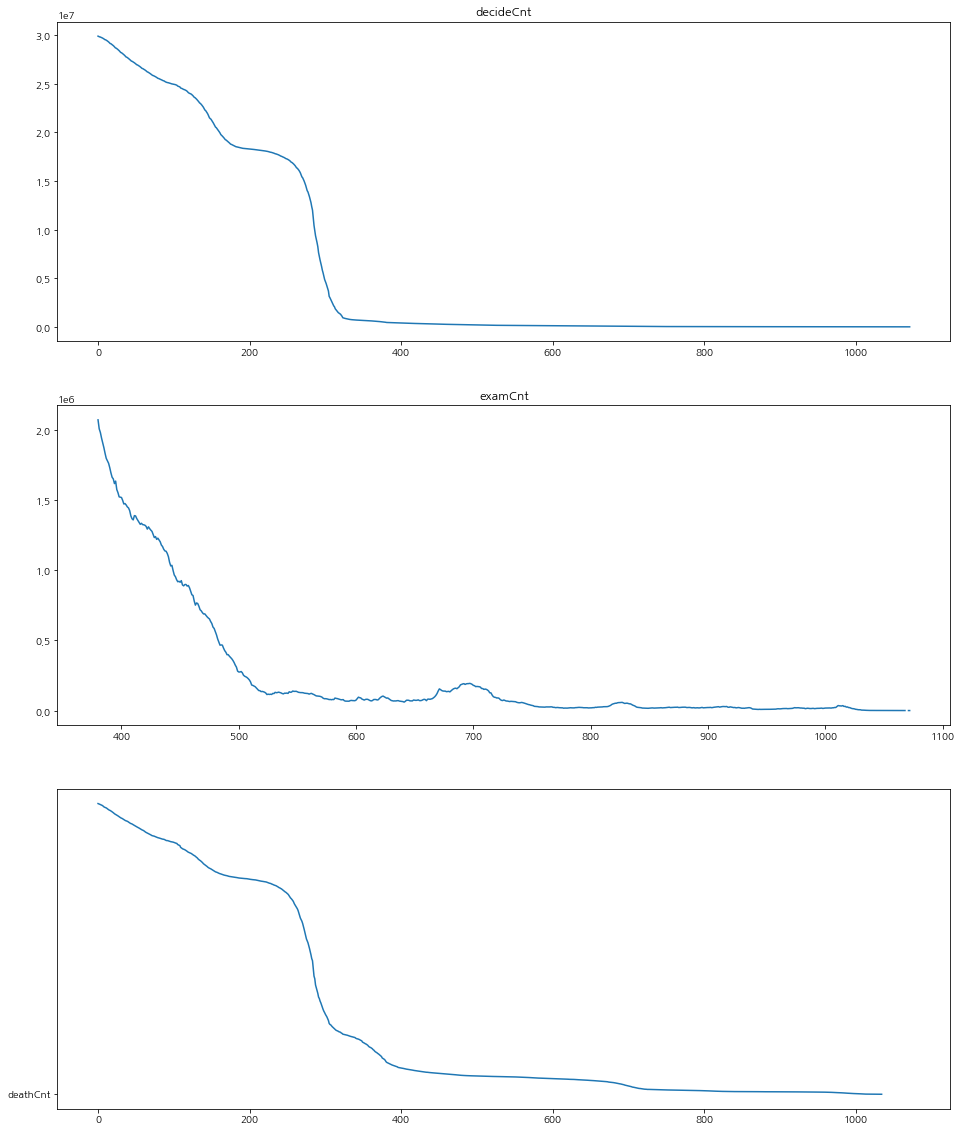

In [23]:
fig, axs = plt.subplots(3, 1, figsize=(16, 20))

axs[0].plot(covid_kr.decideCnt)
axs[0].set_title('decideCnt')
axs[1].plot(covid_kr.examCnt)
axs[1].set_title('examCnt')
axs[2].plot(covid_kr.deathCnt)
axs[2].plot('deathCnt')

plt.show()

그래프 모양이 기하급수적으로 감소하는 모양을 띄고있는데, 코로나 데이터는 이렇게 나올 수가 없다.  
데이터를 살펴보니, 수치가 누적으로 된 것으로 보인다.  
차분을 통해 신규 데이터를 얻고, 데이터 순서도 과거부터 재배열 하자.  
이 작업 전에 우선 분리된 날자를 통합하자.

In [26]:
# 분리된 날짜 데이터 통합
# 데이터 특징을 보니, 같은 날 다른 시간대 결과도 누적이므로 같은 날 데이터 중 더 큰 값을 남기자.

# 중복 확인
covid_kr[covid_kr.duplicated(['stateDt', 'stateTime']) == True]

,stateDt,stateTime,decideCnt,examCnt,deathCnt
594,20210420,00:00,115195.0,66590.0,1802.0
715,20201219,00:00,48570.0,126233.0,659.0
727,20201208,00:00,38755.0,71274.0,552.0
955,20200425,00:00,10718.0,9259.0,240.0
956,20200425,00:00,12801.0,9259.0,240.0
980,20200402,00:00,9976.0,17885.0,169.0
990,20200324,00:00,9037.0,15440.0,120.0
1032,20200221,16:00,204.0,3180.0,1.0
1040,20200218,09:00,31.0,957.0,NaN
1060,20200208,16:00,24.0,939.0,NaN


In [27]:
# 중복 데이터 제거
covid_kr.drop_duplicates(['stateDt', 'stateTime'], inplace=True)
covid_kr = covid_kr.reset_index(drop=True)

In [28]:
# 분리된 날자 통합하기

covid_kr[covid_kr.duplicated(['stateDt']) == True]

,stateDt,stateTime,decideCnt,examCnt,deathCnt
1007,20200301,09:00,3526.0,32422.0,17.0
1009,20200229,09:00,2931.0,29154.0,16.0
1011,20200228,09:00,2022.0,24751.0,13.0
1013,20200227,09:00,1595.0,21097.0,12.0
1015,20200226,09:00,1146.0,16734.0,11.0
1017,20200225,09:00,893.0,13273.0,8.0
1019,20200224,09:00,763.0,8725.0,7.0
1021,20200223,09:00,556.0,6039.0,4.0
1023,20200222,09:00,346.0,5481.0,2.0
1025,20200221,09:00,156.0,2707.0,1.0


In [43]:
covid_day = covid_kr.groupby('stateDt').max()
covid_day.reset_index(inplace=True) # 날짜가 index로 가면서 자연스럽게 역순 배열이 됨.
covid_day.head()

,stateDt,stateTime,decideCnt,examCnt,deathCnt
0,20200101,18:00,NaN,1.0,NaN
1,20200202,09:00,2.0,2.0,2.0
2,20200203,09:00,15.0,NaN,NaN
3,20200204,00:00,NaN,NaN,NaN
4,20200205,19:00,19.0,129.0,NaN


In [44]:
# 중복 확인
covid_day[covid_day.duplicated(['stateDt'])==True]

,stateDt,stateTime,decideCnt,examCnt,deathCnt


In [45]:
# 날자 통합이 되었으므로 stateTime은 제거한다.
covid_day.drop(columns=['stateTime'], inplace=True)

In [79]:
covid_day.head()

,stateDt,decideCnt,examCnt,deathCnt
0,20200101,NaN,1.0,NaN
1,20200202,2.0,2.0,2.0
2,20200203,15.0,NaN,NaN
3,20200204,NaN,NaN,NaN
4,20200205,19.0,129.0,NaN


## 결측치 처리

이제 결측치를 처리해보자.  
decideCnt, examCnt, deathCnt 모두 누적 데이터이므로 NaN이라면 이전 행의 값으로 치환하는 것으로 처리하자.  
앞 행의 값으로 대체하는 작업은 '보간법'으로 할 수 있다.  
단, examCnt의 경우 2021년 12월 02일 이후로는 의도적으로 기입하지 않았기 때문에 보류한다.

In [139]:
covid_day[covid_day['examCnt'].isna() == True]

,stateDt,decideCnt,examCnt,deathCnt
2,20200203,15.0,NaN,NaN
3,20200204,NaN,NaN,NaN
656,20211205,473034.0,NaN,3852.0
657,20211207,482310.0,NaN,3957.0
658,20211208,489484.0,NaN,4020.0
659,20211209,496584.0,NaN,4077.0
660,20211210,503606.0,NaN,4130.0
661,20211213,523088.0,NaN,4293.0
662,20211214,528652.0,NaN,4387.0
663,20211215,536495.0,NaN,4456.0


In [80]:
# 기입 오류 처리
covid_day.loc[covid_day['deathCnt'] == 1, 'deathCnt'] = 2

In [81]:
covid_day[covid_day['deathCnt'] == 1]

,stateDt,decideCnt,examCnt,deathCnt


In [144]:
covid_day_intpol[['decideCnt', 'deathCnt']] = covid_day.interpolate(method='linear')
covid_day_intpol = covid_day_intpol.round(0)
covid_day_intpol.head(50)

ValueError: Columns must be same length as key

In [138]:
# 1행의 데이터는 0으로 하자.
# index가 656 이후로는 examCnt가 없다. 이 값은 건들이지 않도록 하자.

covid_day_intpol.iloc[0] = covid_day_intpol.iloc[0].fillna(0)
covid_day_intpol.tail()

,stateDt,decideCnt,examCnt,deathCnt,newDecideCnt,newDeathCnt
1031,20230114,29774321.0,2071648.0,32912.0,36552.0,45.0
1032,20230115,29806891.0,2071648.0,32949.0,32570.0,37.0
1033,20230116,29821035.0,2071648.0,32984.0,14144.0,35.0
1034,20230117,29861234.0,2071648.0,33014.0,40199.0,30.0
1035,20230118,29898142.0,2071648.0,33057.0,36908.0,43.0


# 신규 확진자, 신규 사망자 데이터 구하기

이제 decideCnt와 deathCnt를 차분해서 일별 신규 데이터를 구해보자.

In [135]:
covid_day_intpol['newDecideCnt'] = covid_day_intpol['decideCnt'].diff(1)
covid_day_intpol['newDeathCnt'] = covid_day_intpol['deathCnt'].diff(1)

In [136]:
covid_day_intpol.head(20)

,stateDt,decideCnt,examCnt,deathCnt,newDecideCnt,newDeathCnt
0,20200101,0.0,1.0,0.0,NaN,NaN
1,20200202,2.0,2.0,2.0,2.0,2.0
2,20200203,15.0,44.0,2.0,13.0,0.0
3,20200204,17.0,87.0,2.0,2.0,0.0
4,20200205,19.0,129.0,2.0,2.0,0.0
5,20200206,23.0,169.0,2.0,4.0,0.0
6,20200207,24.0,327.0,2.0,1.0,0.0
7,20200208,24.0,939.0,2.0,0.0,0.0
8,20200209,27.0,960.0,2.0,3.0,0.0
9,20200210,27.0,809.0,2.0,0.0,0.0


In [137]:
# 첫행 처리
covid_day_intpol.iloc[0] = covid_day_intpol.iloc[0].fillna(0)
covid_day_intpol.tail()

,stateDt,decideCnt,examCnt,deathCnt,newDecideCnt,newDeathCnt
1031,20230114,29774321.0,2071648.0,32912.0,36552.0,45.0
1032,20230115,29806891.0,2071648.0,32949.0,32570.0,37.0
1033,20230116,29821035.0,2071648.0,32984.0,14144.0,35.0
1034,20230117,29861234.0,2071648.0,33014.0,40199.0,30.0
1035,20230118,29898142.0,2071648.0,33057.0,36908.0,43.0


 검사자 중 코로나 확진자 비율도 구해보자


In [114]:
covid_day_intpol['decideRate'] = round(covid_day_intpol['decideCnt'].div(covid_day_intpol['examCnt']) * 100, 2)

In [115]:
covid_day_intpol.head(20)

,stateDt,decideCnt,examCnt,deathCnt,newDecideCnt,newDeathCnt,decideRate
0,20200101,0.0,1.0,0.0,0.0,0.0,0.00
1,20200202,2.0,2.0,2.0,2.0,2.0,100.00
2,20200203,15.0,44.0,2.0,13.0,0.0,34.09
3,20200204,17.0,87.0,2.0,2.0,0.0,19.54
4,20200205,19.0,129.0,2.0,2.0,0.0,14.73
5,20200206,23.0,169.0,2.0,4.0,0.0,13.61
6,20200207,24.0,327.0,2.0,1.0,0.0,7.34
7,20200208,24.0,939.0,2.0,0.0,0.0,2.56
8,20200209,27.0,960.0,2.0,3.0,0.0,2.81
9,20200210,27.0,809.0,2.0,0.0,0.0,3.34


# 데이터 시각화

In [124]:
covid_day_intpol[covid_day_intpol['stateDt'] == 20210227].index[0]


390

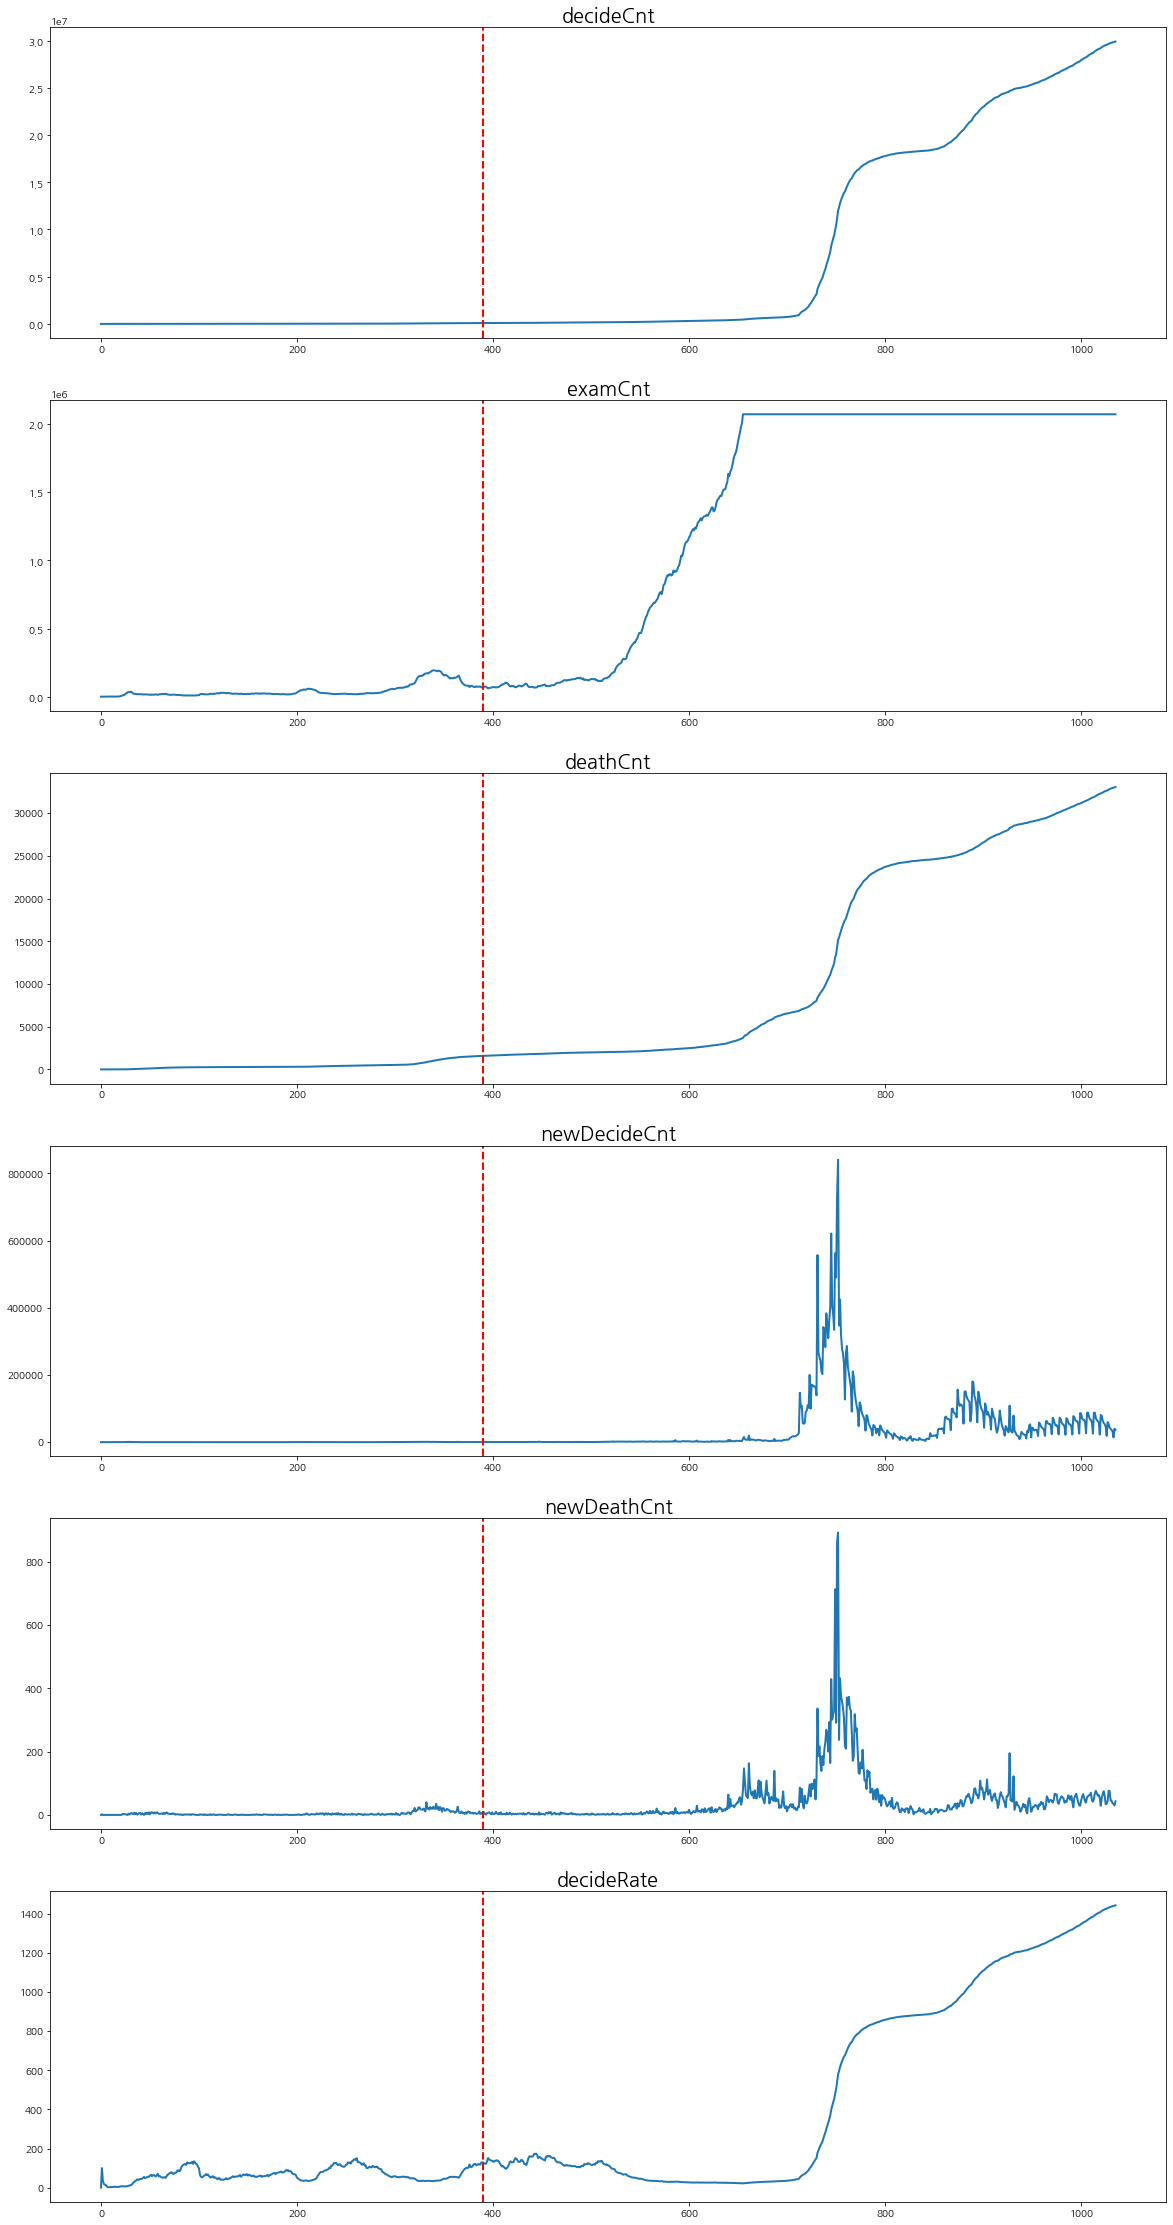

In [128]:
titles = ['decideCnt', 'examCnt', 'deathCnt',	'newDecideCnt',	'newDeathCnt',	'decideRate'][::-1]
vaccine = covid_day_intpol[covid_day_intpol['stateDt'] == 20210227].index[0]

fig, axs = plt.subplots(6, 1, figsize=(20, 40))

# fig.suptitle("연령대 별 사망율 추이")
axs[0].plot(covid_day_intpol.decideCnt, linestyle='-', linewidth='2')
axs[1].plot(covid_day_intpol.examCnt, linestyle='-', linewidth='2')
axs[2].plot(covid_day_intpol.deathCnt, linestyle='-', linewidth='2')
axs[3].plot(covid_day_intpol.newDecideCnt, linestyle='-', linewidth='2')
axs[4].plot(covid_day_intpol.newDeathCnt, linestyle='-', linewidth='2')
axs[5].plot(covid_day_intpol.decideRate, linestyle='-', linewidth='2')

for i in range(6):
    axs[i].set_title(titles.pop(), fontsize=20)
    axs[i].axvline(x=vaccine, color='r', linestyle='--', linewidth=2)
plt.show()

In [130]:
covid_day_intpol[covid_day_intpol['newDecideCnt'] == covid_day_intpol['newDecideCnt'].max()]

,stateDt,decideCnt,examCnt,deathCnt,newDecideCnt,newDeathCnt,decideRate
752,20220328,12003054.0,2071648.0,15186.0,840822.0,892.0,579.4


In [131]:
covid_day_intpol.iloc[752-20: 752+20]

,stateDt,decideCnt,examCnt,deathCnt,newDecideCnt,newDeathCnt,decideRate
732,20220304,3958326.0,2071648.0,8580.0,266838.0,186.0,191.07
733,20220305,4212652.0,2071648.0,8796.0,254326.0,216.0,203.35
734,20220306,4456264.0,2071648.0,8957.0,243612.0,161.0,215.11
735,20220307,4666977.0,2071648.0,9096.0,210713.0,139.0,225.28
736,20220308,4869691.0,2071648.0,9282.0,202714.0,186.0,235.06
737,20220309,5212118.0,2071648.0,9440.0,342427.0,158.0,251.59
738,20220310,5539650.0,2071648.0,9646.0,327532.0,206.0,267.40
739,20220311,5822626.0,2071648.0,9875.0,282976.0,229.0,281.06
740,20220312,6206277.0,2071648.0,10144.0,383651.0,269.0,299.58
741,20220313,6556453.0,2071648.0,10395.0,350176.0,251.0,316.48
